In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/Fiverr/Kokolet91/dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,File Name,Age,Gender,Ethnicity
0,27_0_3_20170119210058457.jpg.chip.jpg,27,0,3
1,27_0_3_20170119211454145.jpg.chip.jpg,27,0,3
2,29_1_1_20170115234825058.jpg.chip.jpg,29,1,1
3,29_1_0_20170113012617623.jpg.chip.jpg,29,1,0
4,30_0_0_20170104000150443.jpg.chip.jpg,30,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9665 entries, 0 to 9664
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  9665 non-null   object
 1   Age        9665 non-null   int64 
 2   Gender     9665 non-null   int64 
 3   Ethnicity  9665 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 302.2+ KB


In [ ]:
from PIL import Image
import os
import numpy as np

def load_and_preprocess_image(image_path, size=(224, 224)):
    # Read the image using PIL
    img = Image.open(image_path)

    # Convert grayscale images to RGB
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Resize the image
    img = img.resize(size)

    # Convert to numpy array and normalize pixel values
    img = np.array(img) / 255.0

    return img

# Path to the root folder containing the subfolders with image files
root_directory = '/content/drive/My Drive/Colab Notebooks/Fiverr/Kokolet91/Organized_Dataset1'

images = []
loaded_filenames = []  # List to keep track of successfully loaded image filenames
for subfolder in os.listdir(root_directory):
    subfolder_path = os.path.join(root_directory, subfolder)
    if os.path.isdir(subfolder_path):  # Check if it's a directory
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):  # Check for image files
                full_image_path = os.path.join(subfolder_path, filename)
                img = load_and_preprocess_image(full_image_path)
                images.append(img)

# Convert the list of images to a numpy array
images = np.array(images)

print(f"Loaded {len(images)} images from the dataset.")


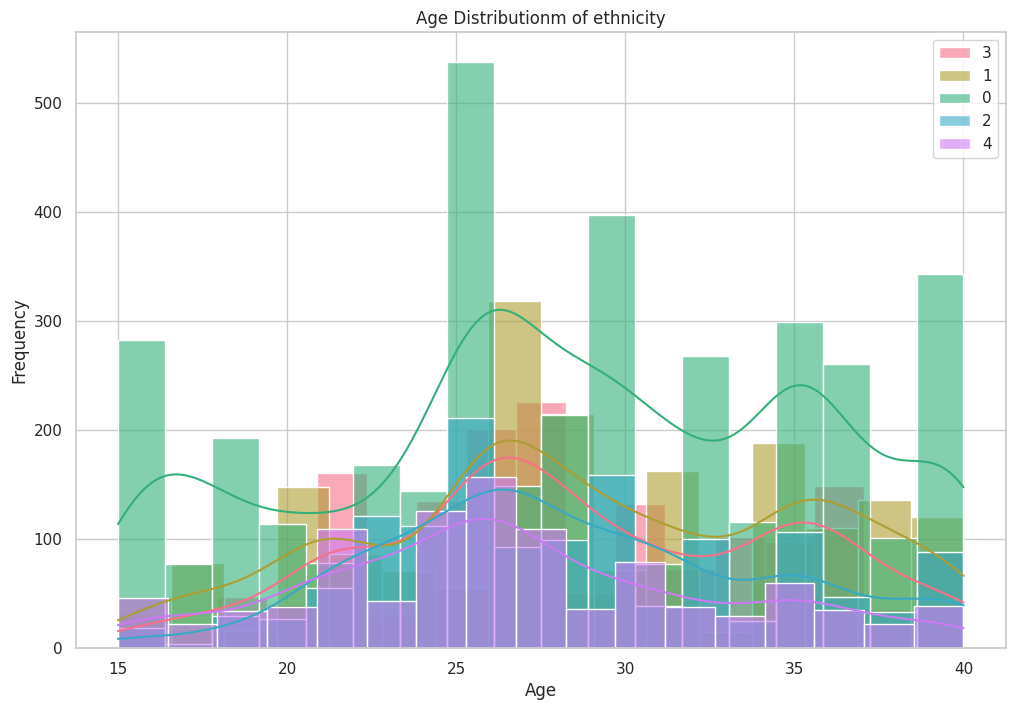

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style= 'whitegrid')

palette= sns.color_palette('husl', n_colors=len(df['Ethnicity'].unique()))

plt.figure(figsize=(12,8))
for i, ethnicity in enumerate(df['Ethnicity'].unique()):
    sns.histplot(df[df['Ethnicity']== ethnicity]['Age'], kde=True, label= ethnicity,color=palette[i], alpha= 0.6)


plt.title('Age Distributionm of ethnicity')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### ***Descriptive Statistics***

```
# This is formatted as code
```



In [ ]:
# Example using pandas
print(df.describe())  # For numerical features
print(df['Ethnicity'].value_counts())  # For categorical feature 'ethnicity'
print(df['Gender'].value_counts())  # For categorical feature 'gender'


               Age       Gender    Ethnicity
count  9665.000000  9665.000000  9665.000000
mean     28.344542     0.509157     1.398345
std       6.550971     0.499942     1.414154
min      15.000000     0.000000     0.000000
25%      24.000000     0.000000     0.000000
50%      28.000000     1.000000     1.000000
75%      34.000000     1.000000     3.000000
max      40.000000     1.000000     4.000000
0    3820
1    1837
3    1616
2    1369
4    1023
Name: Ethnicity, dtype: int64
1    4921
0    4744
Name: Gender, dtype: int64


### ***Distribution Analysis***

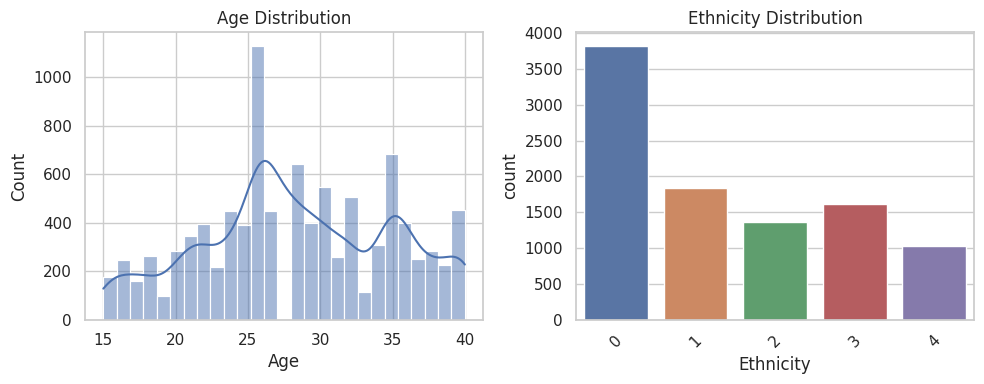

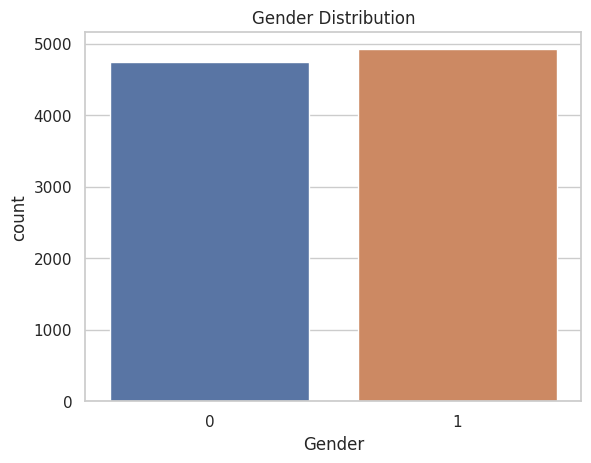

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

# Ethnicity Distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Ethnicity', data=df)
plt.title('Ethnicity Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


### ***Correlation Analysis***

<ipython-input-11-9f126f4a3519>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


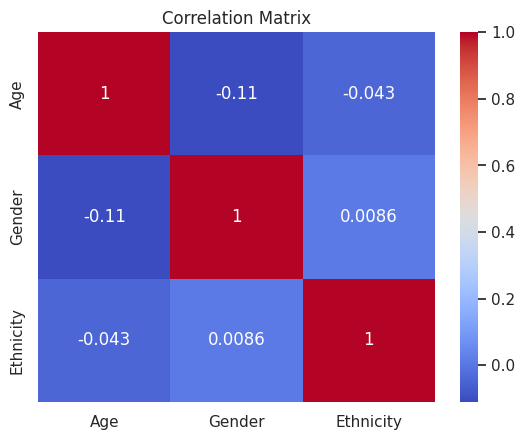

In [ ]:
# Correlation matrix for numerical features
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


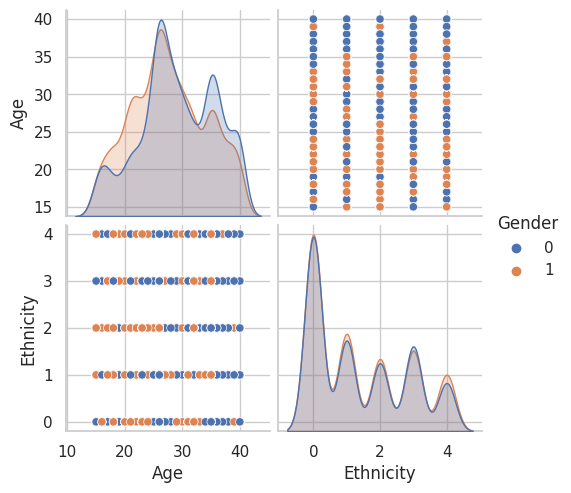

In [ ]:
# Pairwise relationships
sns.pairplot(df, hue='Gender')  # Replace 'gender' with any categorical feature
plt.show()


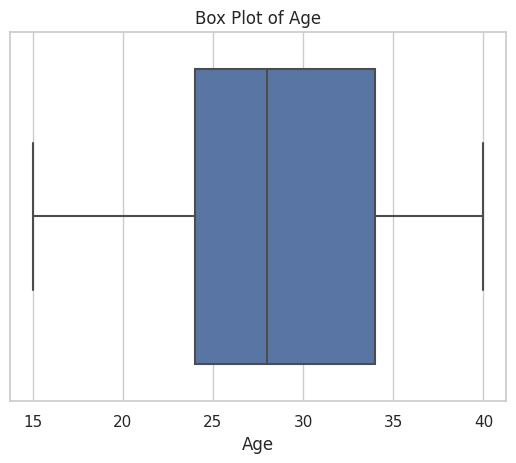

In [ ]:
# Box plot for age
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.show()


In [ ]:
df.columns

Index(['File Name', 'Age', 'Gender', 'Ethnicity'], dtype='object')

In [ ]:
Age= df["Age"]

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# Load VGG16 pre-trained on ImageNet data, exclude top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False)

# Make a model to get the output of VGG16's last convolutional block
feature_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

# Function to extract features using the pre-loaded images
def extract_features(images, feature_model):
    # Preprocess the images for the VGG16 model
    images_preprocessed = preprocess_input(images)

    # Extract features
    features = feature_model.predict(images_preprocessed, batch_size=32)  # Adjust batch_size as needed

    # Flatten the features to one dimension
    features_flattened = features.reshape(features.shape[0], -1)

    return features_flattened

# Extract features for all pre-loaded images
extracted_features = extract_features(images, feature_model)





303/303 [==============================] - 14s 20ms/step


In [ ]:
import numpy as np

# Select the columns for additional features
additional_features = df[['Age', 'Gender', 'Ethnicity']].values  # Adjust column names as needed

# Ensure it's a NumPy array
additional_features = np.array(additional_features)


In [ ]:
# Assuming 'extracted_features' is your array of features extracted from images
final_features = np.concatenate([extracted_features, additional_features], axis=1)


In [ ]:
def assign_age_category(age):
    if age in range(15, 19):
        return '15-18'
    elif age in range(19, 23):
        return '19-22'
    elif age in range(23, 27):
        return '23-26'
    elif age in range(27, 31):
        return '27-30'
    elif age in range(31, 36):
        return '31-35'
    elif age in range(36, 41):
        return '36-40'
    else:
        return 'Other'

# Assuming 'df' is your DataFrame and it has a column 'Age' with individual ages
df['Age Range'] = df['Age'].apply(assign_age_category)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the age range categories to numerical labels
df['Age Range Encoded'] = label_encoder.fit_transform(df['Age Range'])


In [ ]:
# Assuming 'final_features' contains your extracted features
X = final_features  # Your features
y = df['Age Range Encoded']  # Encoded age ranges as the target variable


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now use X_train_scaled and X_test_scaled for training and testing your model


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
# Initialize the Logistic Regression model
# For multiclass classification, set multi_class to 'ovr' (one-vs-rest) or 'multinomial'
logistic_model = LogisticRegression(multi_class='ovr', max_iter=1000, solver='lbfgs')

# Train the model on the scaled training set
logistic_model.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_test_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")
print(classification_report(y_test, y_test_pred))



Test Accuracy: 0.6497672012415934
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       139
           1       0.64      0.32      0.42       237
           2       0.50      0.65      0.57       421
           3       0.51      0.58      0.54       412
           4       0.71      0.56      0.62       377
           5       0.89      0.95      0.92       347

    accuracy                           0.65      1933
   macro avg       0.70      0.66      0.67      1933
weighted avg       0.66      0.65      0.64      1933



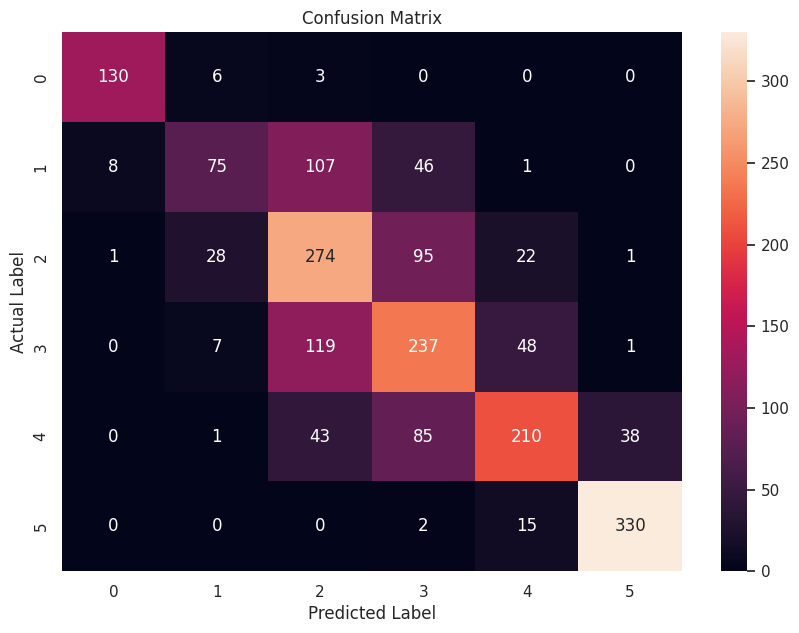

Confusion Matrix:
          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
Actual 0          130            6            3            0            0   
Actual 1            8           75          107           46            1   
Actual 2            1           28          274           95           22   
Actual 3            0            7          119          237           48   
Actual 4            0            1           43           85          210   
Actual 5            0            0            0            2           15   

          Predicted 5  
Actual 0            0  
Actual 1            0  
Actual 2            1  
Actual 3            1  
Actual 4           38  
Actual 5          330  


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# Optionally, convert the confusion matrix to a DataFrame for better readability
cm_df = pd.DataFrame(cm, index=[f'Actual {i}' for i in range(cm.shape[0])],
                     columns=[f'Predicted {i}' for i in range(cm.shape[1])])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm_df)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the training set
# Assuming 'X_train' and 'y_train' are your training features and labels
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
# Assuming 'X_test' and 'y_test' are your testing features and labels
y_test_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.3859286083807553
              precision    recall  f1-score   support

           0       0.33      0.01      0.01       139
           1       0.45      0.02      0.04       237
           2       0.34      0.66      0.45       421
           3       0.36      0.56      0.44       412
           4       0.45      0.45      0.45       377
           5       0.65      0.18      0.28       347

    accuracy                           0.39      1933
   macro avg       0.43      0.31      0.28      1933
weighted avg       0.44      0.39      0.34      1933

[[  1   0  59  64  11   4]
 [  0   5 144  66  20   2]
 [  0   4 279  95  38   5]
 [  0   2 124 231  45  10]
 [  1   0 113  82 169  12]
 [  1   0  95  97  93  61]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel='rbf')

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.6409725814795655
              precision    recall  f1-score   support

           0       0.82      0.69      0.75       139
           1       0.46      0.12      0.19       237
           2       0.50      0.79      0.61       421
           3       0.64      0.66      0.65       412
           4       0.68      0.71      0.69       377
           5       0.88      0.71      0.79       347

    accuracy                           0.64      1933
   macro avg       0.66      0.61      0.61      1933
weighted avg       0.65      0.64      0.63      1933



In [ ]:
import numpy as np

# Assuming 'cm' is your confusion matrix
total_entries = np.sum(cm)
print(f"Total entries in the confusion matrix: {total_entries}")

# Assuming 'y_test' is your test set labels
total_images = len(y_test)
print(f"Total number of images in the test dataset: {total_images}")

# Check if the numbers match
if total_entries == total_images:
    print("The total numbers in the confusion matrix match the number of images in the test dataset.")
else:
    print("The total numbers in the confusion matrix do NOT match the number of images in the test dataset.")


Total entries in the confusion matrix: 1933
Total number of images in the test dataset: 1933
The total numbers in the confusion matrix match the number of images in the test dataset.


***Using Synthetic Minority.Over- Sampling Technique(SMOTE)***

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


## logistic regression using **SMOTE**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(multi_class='ovr', max_iter=1000, solver='lbfgs')

# Train the model on the resampled (SMOTE) training set
logistic_model.fit(X_train_smote, y_train_smote)

# Predict on the scaled test set
y_test_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.6352819451629591
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       139
           1       0.46      0.47      0.47       237
           2       0.52      0.49      0.50       421
           3       0.52      0.56      0.54       412
           4       0.66      0.57      0.61       377
           5       0.89      0.96      0.92       347

    accuracy                           0.64      1933
   macro avg       0.65      0.67      0.66      1933
weighted avg       0.63      0.64      0.63      1933



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the number of classes
num_classes = 6  # Adjust this based on the number of classes in your dataset

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # num_classes should match the number of categories in your task
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert age ranges to numerical labels
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(df['Age Range'])

# Convert numerical labels to one-hot encoding
one_hot_labels = to_categorical(numerical_labels)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)
